In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

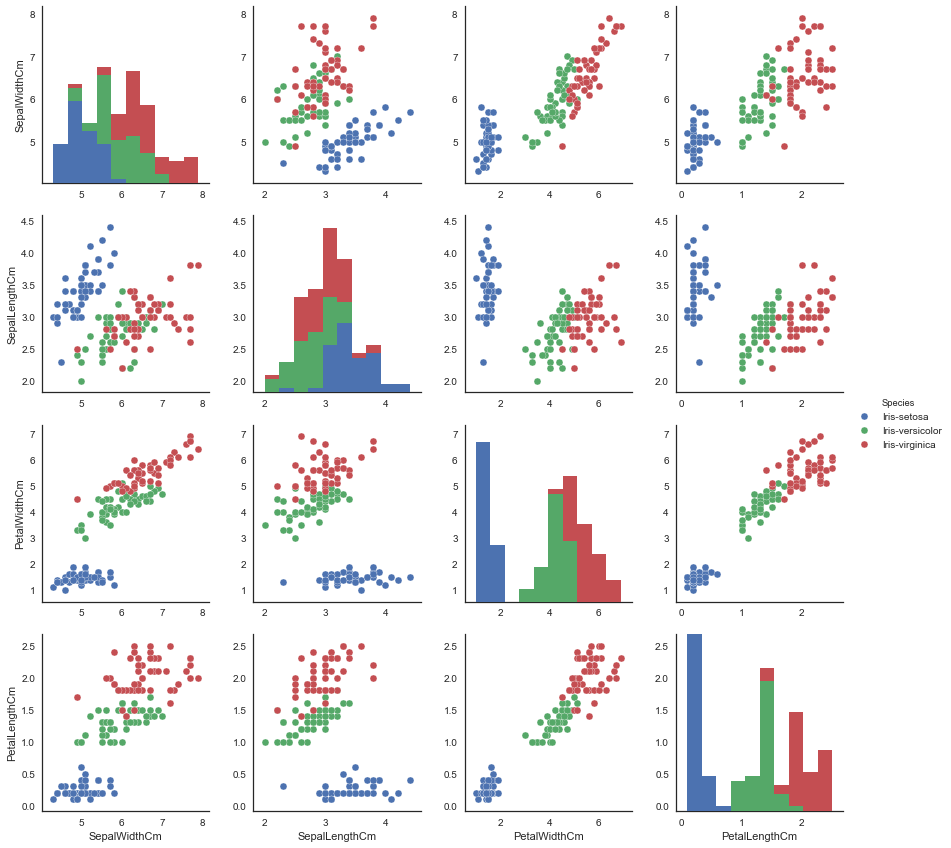

In [2]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris.columns=["SepalWidthCm","SepalLengthCm","PetalWidthCm","PetalLengthCm","Species"]
sns.pairplot(iris, hue="Species", size=3)
plt.show()

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df.columns=["SW","SL","PW","PL","T"]
df["B"] = 1
df["T2"] = -1

for i in range(df.shape[0]):
    if df["T"][i]=='Iris-setosa':
        df["T2"][i]=1
    else:
        df["T2"][i]=-1
        
df_random = df.sample(frac=1)
df_random = df_random.reindex_axis(["B","SW","SL","PW","PL","T2","T"], axis=1)

df_test = df_random[120:]
df_train = df_random[0:120]

random.seed(100)
weights = np.array(np.random.normal(0, 0.1, 5))

x = np.array(df_train.iloc[:,0:5])
y = np.array(df_train.iloc[:,5])

for m in range(1000):
    z = np.matmul(x,weights)
    k = z
    for i in range(len(z)):
        if (z[i]>=0):
            k[i] = +1
        else:
            k[i] = -1
    error = sum((y - k)**2)*0.5/df_train.shape[0]
    #print (error)
    weights[0] = weights[0] + 1.0*sum(x[:,0]*(y-k))/df_train.shape[0]*2
    for i in range(len(weights)-1):
        weights[i+1] = weights[i+1] + 0.5*sum(x[:,i+1]*(y-k))/df_train.shape[0]
print("Error Rate:", error)

C:\PythonConda\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\PythonConda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Error Rate: 0.0


In [4]:
x_test = np.array(df_test.iloc[:,0:5])
z_test_setosa = np.matmul(x_test, weights) 

k_test_setosa = list()

for i in range(len(z_test_setosa)):
    if (z_test_setosa[i]>=0):
        k_test_setosa.append ("setosa")
    else:
        k_test_setosa.append ("others")

In [5]:
for i in range(df.shape[0]):
    if df["T"][i]=='Iris-versicolor':
        df["T2"][i]=1
    else:
        df["T2"][i]=-1
        
random.seed(100)
weights = np.array(np.random.normal(0, 0.1, 5))

x = np.array(df_train.iloc[:,0:5])
y = np.array(df_train.iloc[:,5])

for m in range(1000):
    z = np.matmul(x,weights)
    k = z
    for i in range(len(z)):
        if (z[i]>=0):
            k[i] = +1
        else:
            k[i] = -1
    error = sum((y - k)**2)*0.5/df_train.shape[0]
    #print (error)
    weights[0] = weights[0] + 1.0*sum(x[:,0]*(y-k))/df_train.shape[0]*2
    for i in range(len(weights)-1):
        weights[i+1] = weights[i+1] + 0.5*sum(x[:,i+1]*(y-k))/df_train.shape[0]
print("Error Rate:", error)

C:\PythonConda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\PythonConda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Error Rate: 0.0


In [6]:
z_test_versicolor = np.matmul(x_test, weights) 

k_test_versicolor = list()

for i in range(len(z_test_versicolor)):
    if (z_test_versicolor[i]>=0):
        k_test_versicolor.append ("versicolor")
    else:
        k_test_versicolor.append ("others")

In [7]:
pred = list()

for i in range(len(k_test_setosa)):
    if (k_test_setosa[i] == 'setosa'):
        pred.append('Iris-setosa')
    elif (k_test_versicolor[i] == 'versicolor'):
        pred.append('Iris-versicolor')
    else:
        pred.append('Iris-virginica')

In [8]:
j = 0.0
for i in range(len(k_test_setosa)):
    if (pred[i] == df_test.iloc[i,6]):
        j = j + 1
        
acc = j/len(k_test_setosa)    
print("Accuracy is", acc)

Accuracy is 0.7
